(12, 7.0) 2 2


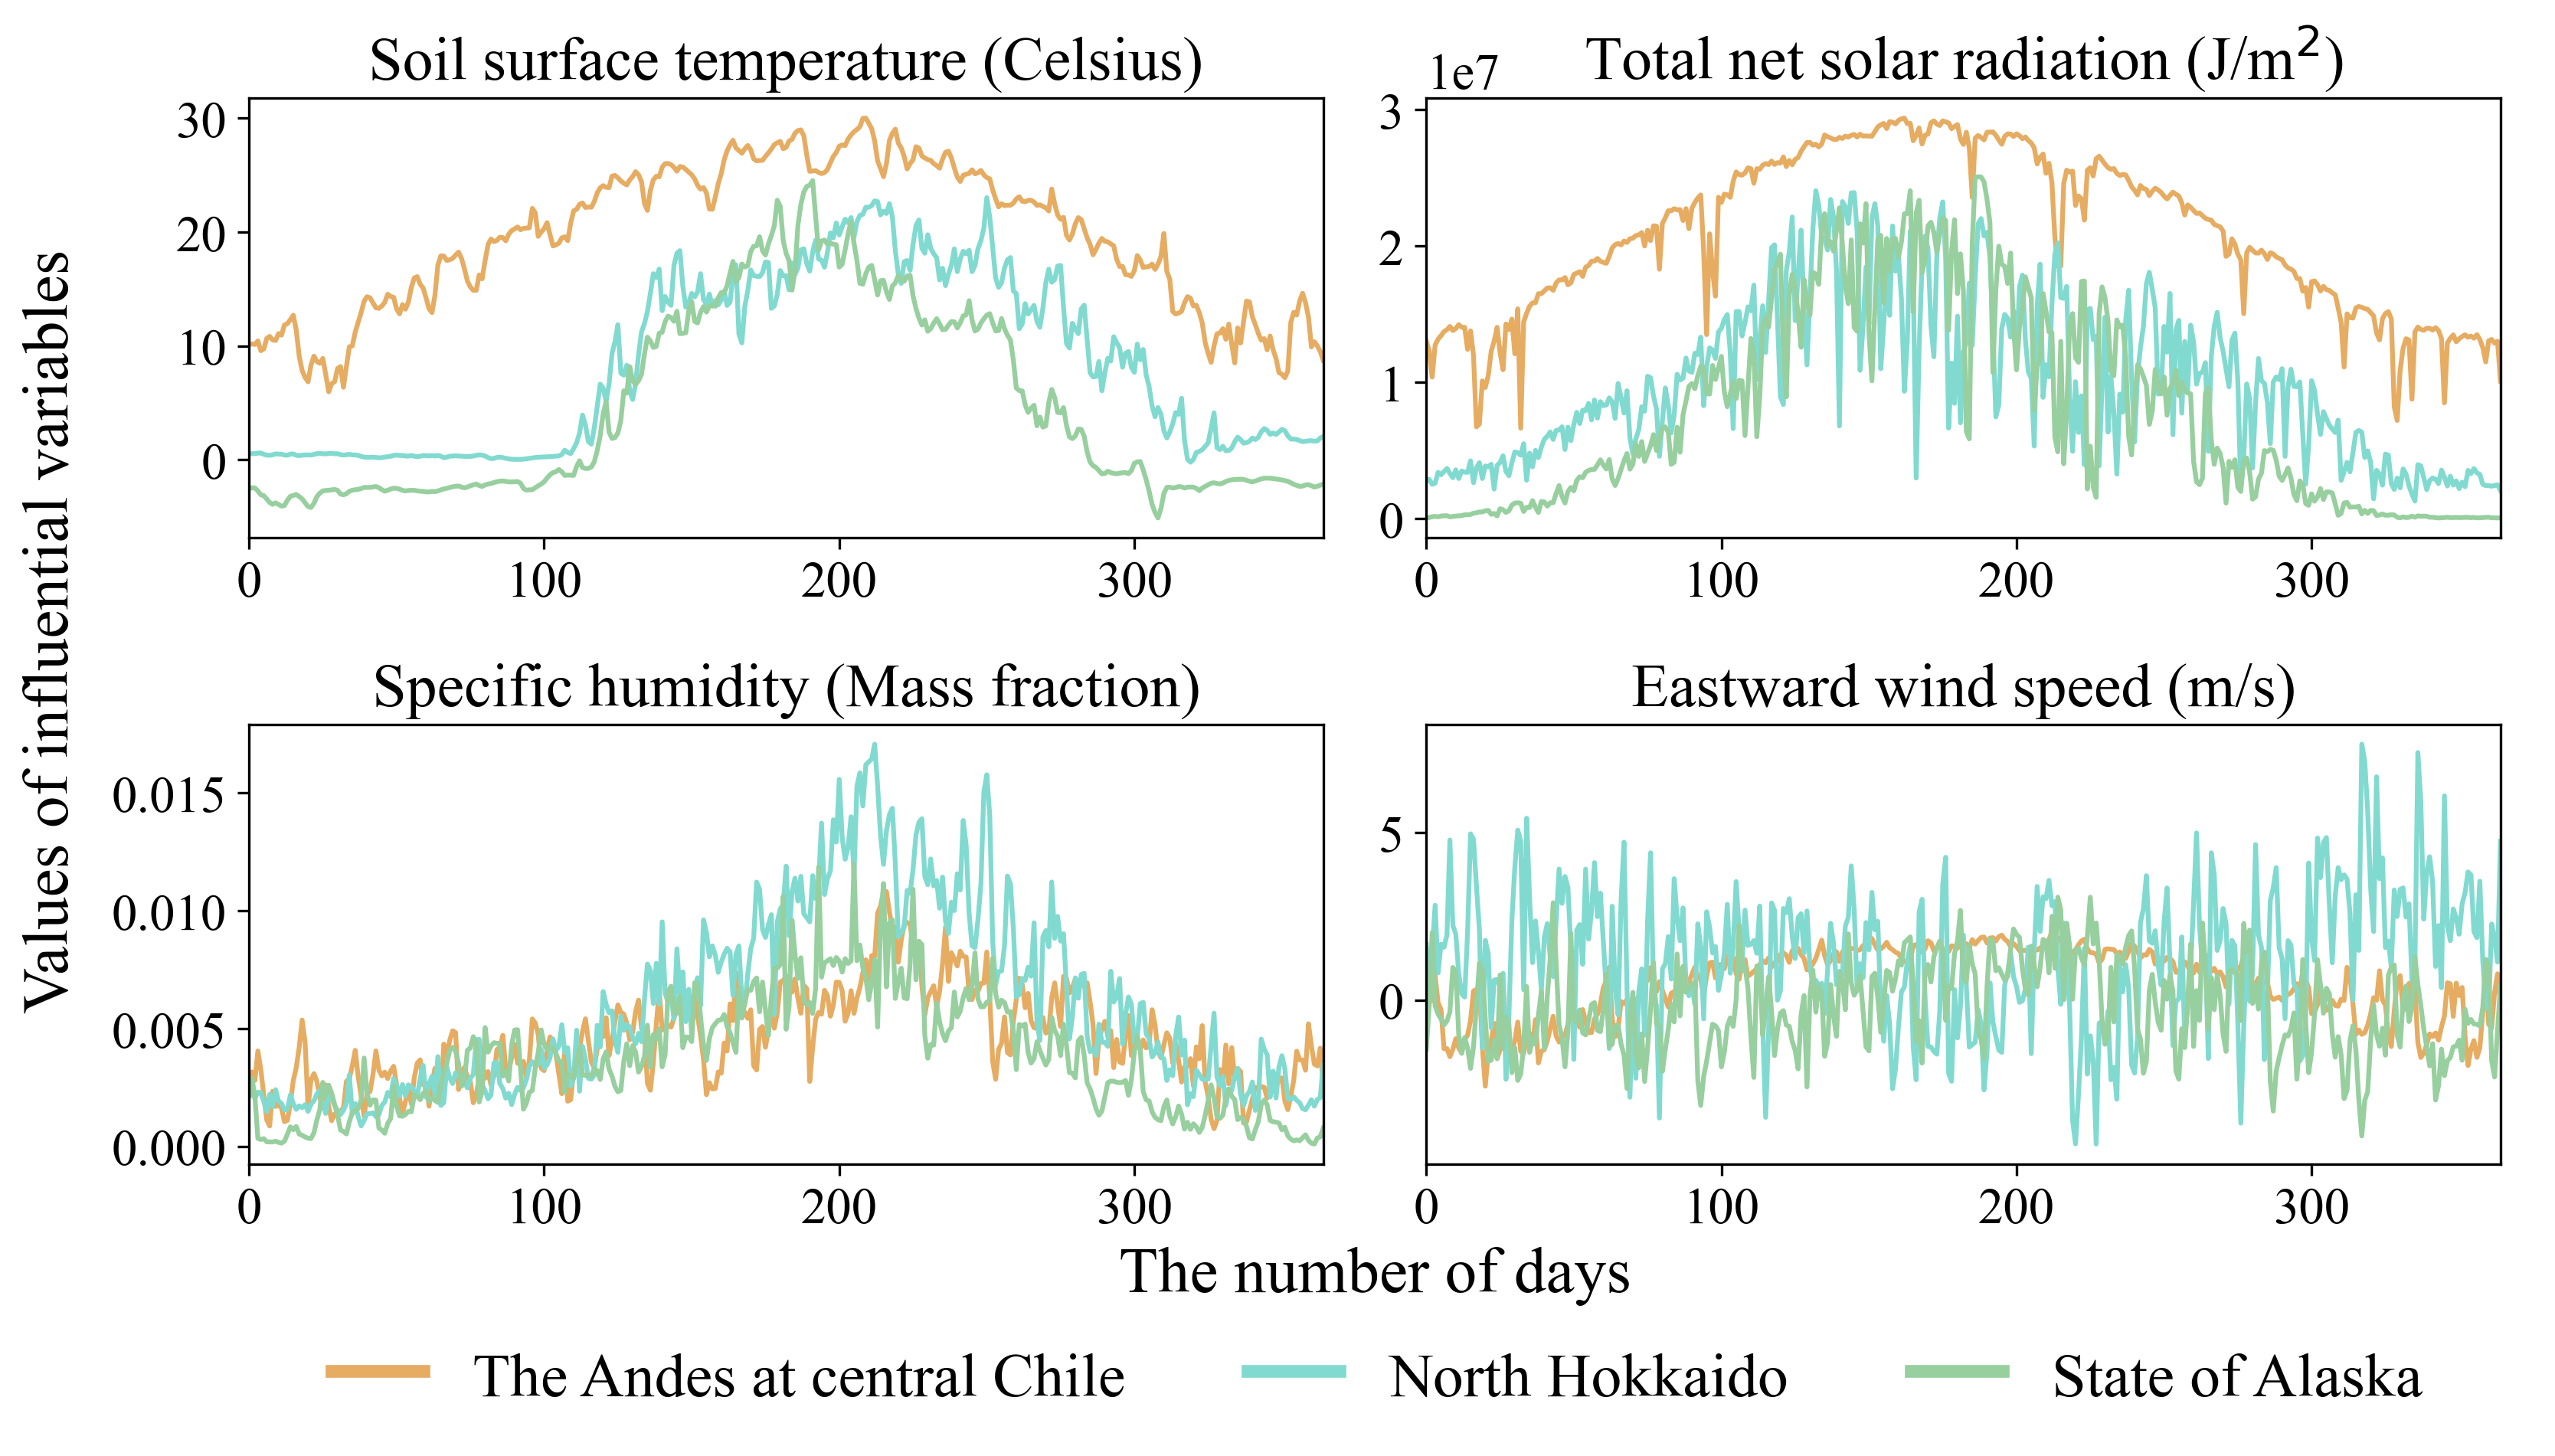

In [7]:
import matplotlib
matplotlib.rc("text", usetex=False)
matplotlib.rc("font", family="serif", serif="Times New Roman", size=16)
matplotlib.rc("figure", autolayout=True, figsize=(4,4))
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

locations = ["The Andes at central Chile", "North Hokkaido", "State of Alaska"]
locations_folder = ["GEE-Chile", "GEE-Hokkaido", "GEE-Alaska", "GEE-Riyadh"]

variables = ["Soil surface temperature (Celsius)", "Total net solar radiation (J/m$^2$)", "Specific humidity (Mass fraction)", "Eastward wind speed (m/s)"]
variables_files = ["Land_surface_temperature.csv", "Solar_radiation.csv", "Specific_humidity.csv", "Wind_speed_U.csv"]

colors = ["#E6AC62", "#81DAD0", "#97CF9F", "#419198"]

max_col = 2
if len(variables) > max_col:
    width = max_col
    height = len(variables) // max_col + 1 if len(variables) % max_col != 0 else len(variables) // max_col
    figsize = (12, 3.5 * height)
else:
    figsize = (3 * len(variables), 3)
    width = len(variables)
    height = 1
print(figsize, width, height)

fig = plt.figure(figsize=figsize, dpi=300)
for idx, (var, filename) in enumerate(zip(variables, variables_files)):
    ax = plt.subplot(height, width, idx + 1)
    for loc_idx, (loc, loc_filename) in enumerate(zip(locations, locations_folder)):
        df = pd.read_csv(os.path.join(loc_filename, filename))
        value = df.values[:, 1]
        if len(df)>365:
            value = value[np.arange(0, len(value), len(value)//365)]
        x = np.arange(len(value))
        ax.plot(x, value, color = colors[loc_idx])
        ax.set_title(var)
        ax.set_xlim([0, len(value)-1])

ax = fig.add_subplot(111, frameon=False)
# plt.tick_params(labelcolor='none', which = 'both', top=False,bottom=False, left = False, right=False)
ax.set_ylabel('Values of influential variables\n', fontsize=20)
ax.set_xlabel('The number of days', fontsize=20)
plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)

from matplotlib.lines import Line2D

legend = ax.legend(handles=[
    Line2D([], [], color=colors[loc_idx], label=loc, linewidth=4) for loc_idx, loc in enumerate(locations)],
    loc='best', bbox_to_anchor=(0.99, -0.12), handleheight=1, handlelength=1.50, fontsize='large',
    title_fontsize='large', fancybox=False, frameon=False, ncol=4)
plt.savefig("example_variables.pdf", dpi=500)
plt.show()